<a href="https://colab.research.google.com/github/nicolastibata/Talleres_CDA/blob/main/Taller%201/MINE4101_Taller1_Nicolas_Tibata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Taller 1: Inversiones inmobiliarias para alquiler vacacional
Integrante: Nicolás Tibatá

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Estrategia de Análisis:**

La estrategia de análisis para establecer la mejor opción de inversión inmobiliaria comenzará con un análisis exploratorio de datos (EDA) que incluirá el cálculo de estadísticos básicos (media, mediana, moda, desviación estándar) de las variables clave como el tipo de propiedad, precio, capacidad de alojamiento, y la disponibilidad. Este análisis permitirá identificar tendencias iniciales, dispersión de datos y detectar valores atípicos. Luego se realizarán gráficos univariados (histogramas y gráficos de barras) para visualizar la distribución de cada variable, seguidos de gráficos bivariados como diagramas de dispersión y boxplots para analizar la relación entre el precio y otras variables, como el número de reseñas y las calificaciones.

Finalmente, se emplearán técnicas de análisis multivariado, como gráficos de pares (pairplots), para evaluar cómo interactúan múltiples atributos y su influencia en la rentabilidad. Se prestará especial atención a variables como el tipo de propiedad, el precio y la calificación de los huéspedes, que podrían determinar el retorno de inversión (ROI). Esta estrategia de análisis permitirá identificar patrones y ver los atributos más importantes de las propiedades más rentables y mejor valoradas, guiando la mejor opción de inversión.

### Análisis exploratorio de Datos (EDA)

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/nicolastibata/Talleres_CDA/refs/heads/main/Taller%201/listings_chicago.csv')
dataset.info()

# .info() da toda la información necesaria como primeros pasos, como la cantidad de columnas y filas, tipos de columnas, cantidad de nulos por columna,
# cantidad de columnas por el tipo de variables. etc...

# En este caso tenemos:
# 7592 filas, 75 columnas, 17 son tipo float, 23 tipo int y 35 tipo object (las variables tipo object pueden ser de tipo string o algun otro, por lo tanto
# deben ser revisados).
# También hay 2 columnas llenas de nulos, por lo tanto serán revisadas para no incluirlas en el análisis.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7952 non-null   int64  
 1   listing_url                                   7952 non-null   object 
 2   scrape_id                                     7952 non-null   int64  
 3   last_scraped                                  7952 non-null   object 
 4   source                                        7952 non-null   object 
 5   name                                          7952 non-null   object 
 6   description                                   7748 non-null   object 
 7   neighborhood_overview                         5392 non-null   object 
 8   picture_url                                   7952 non-null   object 
 9   host_id                                       7952 non-null   i

In [17]:
dataset['id'].nunique() # No hay duplicidad de datos entonces podemos hacer drop del ID

7952

In [10]:
# Gracias a .info() nos damos cuenta que 'price' está en tipo object pero debe ser tipo float, por lo tanto lo modificamos
dataset["price_float"] = dataset["price"].str.replace("[$,]", "", regex=True).astype(float)

Basándonos en el tipo de dato, completitud, calidad y el diccionario de datos. Se definieron las siguientes variables a analizar, ya que son los atributos que más representan a las propiedad y de los que pueden responder esas preguntas relacionadas a hacer una mejor inversión. Las variables son ` room_type, accommodates, bathrooms, bedrooms, host_is_superhost, price_float, availability_30, number_of_reviews, review_scores_rating, neighbourhood_cleansed`.

Sin embargo, dado el requerimiento 2 del taller, se escogerán los siguientes 5 atributos: `'room_type', 'accommodates', 'bathrooms','review_scores_rating', 'price_float'`. De todas formas los siguientes pasos de la estrategia de análisis se realizará con el total de variables preseleccionadas.

In [37]:
dataset_analysis = dataset[['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'host_is_superhost', 'price_float',
                            'availability_30', 'number_of_reviews', 'review_scores_rating', 'neighbourhood_cleansed']]

dataset_analysis

,room_type,accommodates,bathrooms,bedrooms,host_is_superhost,price_float,availability_30,number_of_reviews,review_scores_rating,neighbourhood_cleansed
0,Entire home/apt,5,1.0,2.0,t,103.0,4,216,4.78,Lower West Side
1,Entire home/apt,6,1.0,2.0,f,169.0,24,71,4.73,West Town
2,Entire home/apt,4,1.0,2.0,f,128.0,1,1,5.00,Near West Side
3,Entire home/apt,3,1.0,1.0,f,96.0,0,43,4.93,Lincoln Square
4,Entire home/apt,6,2.0,2.0,f,315.0,2,6,4.67,Lincoln Park
...,...,...,...,...,...,...,...,...,...,...
7947,Entire home/apt,4,1.5,1.0,f,100.0,0,0,NaN,Near North Side
7948,Entire home/apt,6,2.0,3.0,t,178.0,5,133,4.89,West Town
7949,Entire home/apt,4,1.0,1.0,f,343.0,30,0,NaN,Near North Side
7950,Entire home/apt,4,1.0,1.0,f,139.0,14,42,4.69,Douglas


In [19]:
variables_univariado = ['room_type', 'accommodates', 'bathrooms','review_scores_rating', 'price_float']

In [20]:
def analisis_univariado(df, columns):
    variables = columns

    for var in variables:
        print(f"\nAnálisis Univariado de la variable: {var}\n")

        # Descripción de las variables
        print(df[var].describe())

        # Si es categórica, generamos gráfico de barras
        if df[var].dtype == 'object':
            plt.figure(figsize=(8, 4))
            sns.countplot(y=df[var], order=df[var].value_counts().index)
            plt.title(f'Distribución de la variable {var}')
            plt.show()

        # Si es numérica, generamos histograma
        else:
            plt.figure(figsize=(8, 4))
            sns.histplot(df[var], kde=True, bins=20)
            plt.title(f'Distribución de la variable {var}')
            plt.show()


Análisis Univariado de la variable: room_type

count                7952
unique                  4
top       Entire home/apt
freq                 6165
Name: room_type, dtype: object


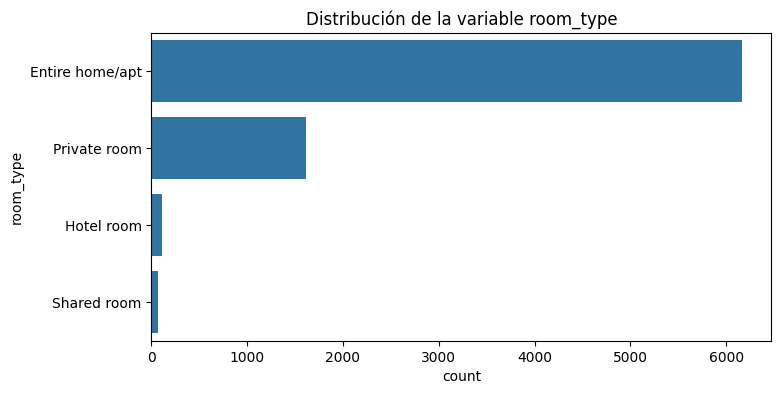


Análisis Univariado de la variable: accommodates

count    7952.000000
mean        4.395624
std         3.048540
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        16.000000
Name: accommodates, dtype: float64


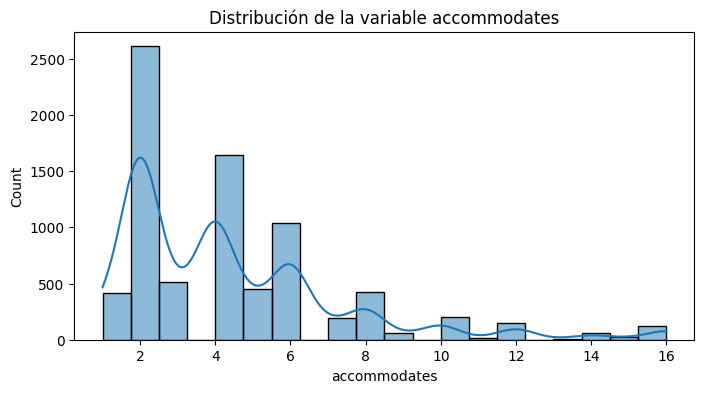


Análisis Univariado de la variable: bathrooms

count    7597.000000
mean        1.427998
std         0.796138
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.500000
Name: bathrooms, dtype: float64


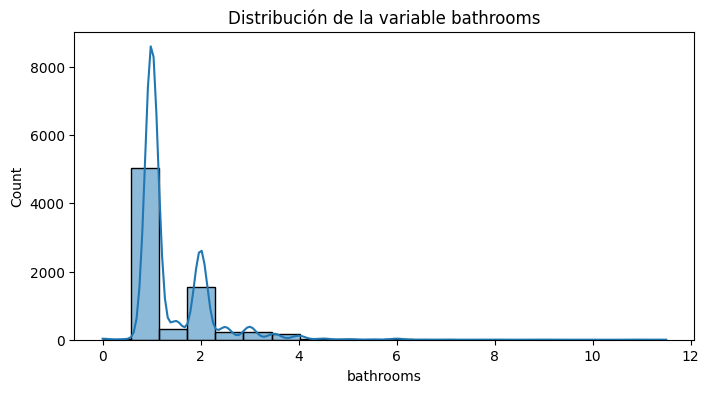


Análisis Univariado de la variable: review_scores_rating

count    6503.000000
mean        4.759703
std         0.412168
min         1.000000
25%         4.710000
50%         4.860000
75%         4.980000
max         5.000000
Name: review_scores_rating, dtype: float64


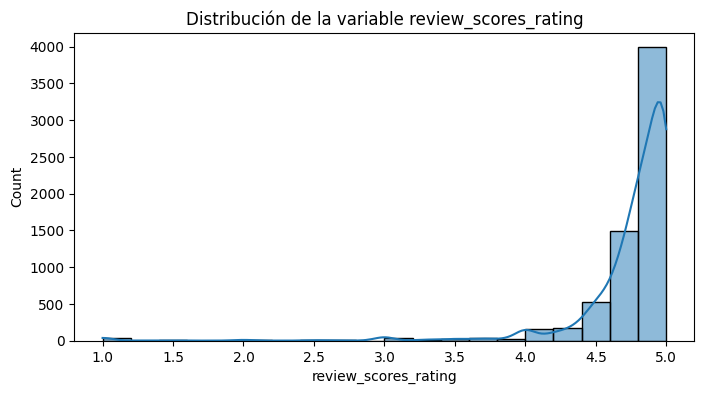


Análisis Univariado de la variable: price_float

count    7598.000000
mean      225.515399
std       245.570005
min        13.000000
25%       100.000000
50%       166.000000
75%       266.000000
max      5120.000000
Name: price_float, dtype: float64


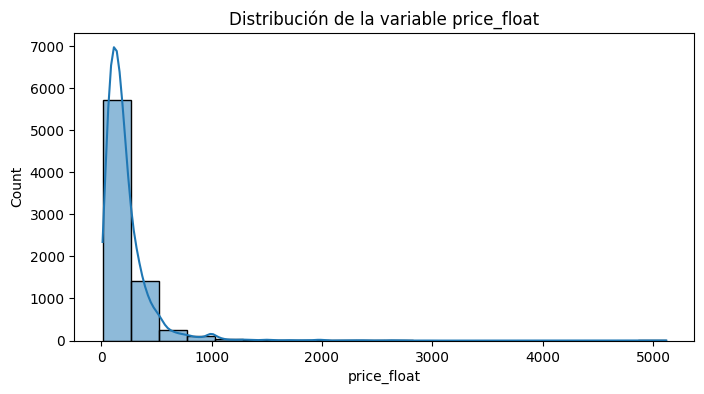

In [22]:
analisis_univariado(dataset, variables_univariado)

De los siguientes datos podemos sacar la siguiente información:
- Room Type: Hay 4 tipos de habitación, donde predomina los airbnb de apartamentos o casas completas y no tanto por habitación individual.
- Accommodates: El promedio de personas que pueden estar en airbnbs en chicago es de 4 personas, sin embargo hay variablidad, pues hay sitios con capacidad de 16 personas.
- Bathrooms: Como era de esperarse, el promedio es de 1.42 esto signfica que la mayoria tiene 1 baño o 1.5 baños es decir, algunos con un solo baño personal con ducha y otros con baño de visitas + baño personal con ducha.
- Review Scores Rating: La mayoría de ratings son positivos, con un promedio de 4.75 / 5.0, sin embargo hay algunos que no les ha ido tan bien.
- Price: En este caso price float se nota que tiene outliers, es decir precios demasiado grandes que pueden sesgar nuestros datos. A pesar de eso, vemos un promedio de 225 dolares, esto no será del todo cierto. Por lo tanto se tendrá que revisar dicha variable para un análisis acertado.

### Análisis Multivariado

count    6944.000000
mean      173.135945
std       100.225396
min        13.000000
25%        97.000000
50%       154.000000
75%       232.250000
max       455.000000
Name: price_float, dtype: float64


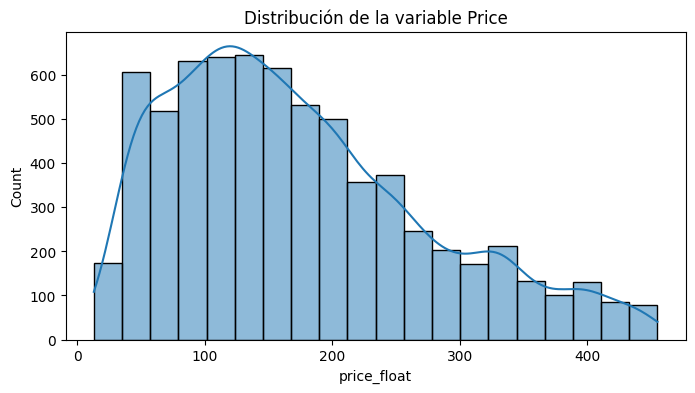

In [42]:
# Antes de analizar modifiquemos el tema de price_float con estadística

# Vamos a tener un threshold
q1 = dataset_analysis["price_float"].quantile(0.25)
q3 = dataset_analysis["price_float"].quantile(0.75)
iqr = q3 - q1

dataset_analysis = dataset_analysis[dataset_analysis["price_float"] <= q3 + 1.5 * iqr]
print(dataset_analysis['price_float'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(dataset_analysis['price_float'], kde=True, bins=20)
plt.title(f'Distribución de la variable Price')
plt.show()

En este caso vemos un price menos sesgado, sin presencia de outliers. Tiene un promedio de 173 dolares por noche, con una mediana de 154 dolares. Vemos cómo la mediana es menos sensible a outliers que el promedio.

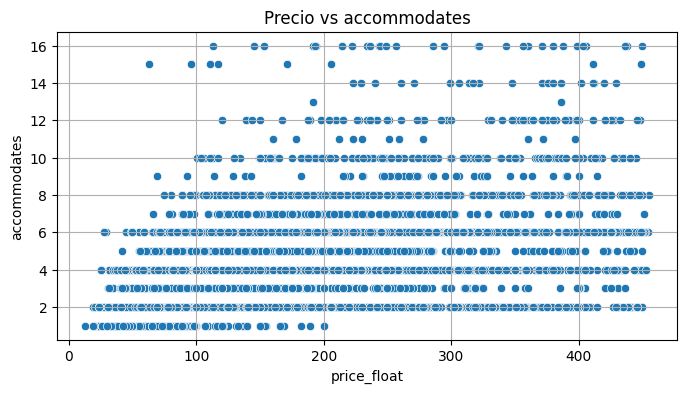

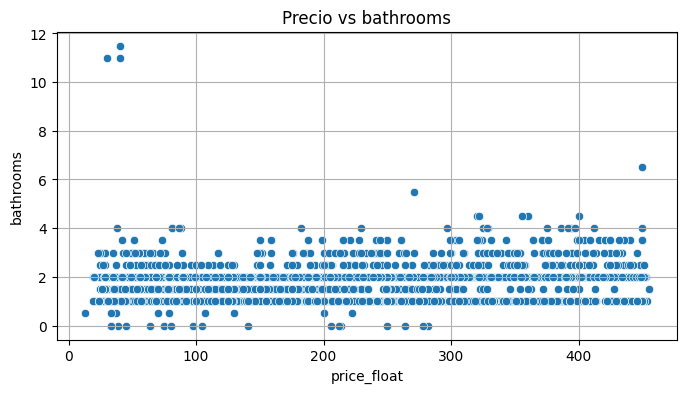

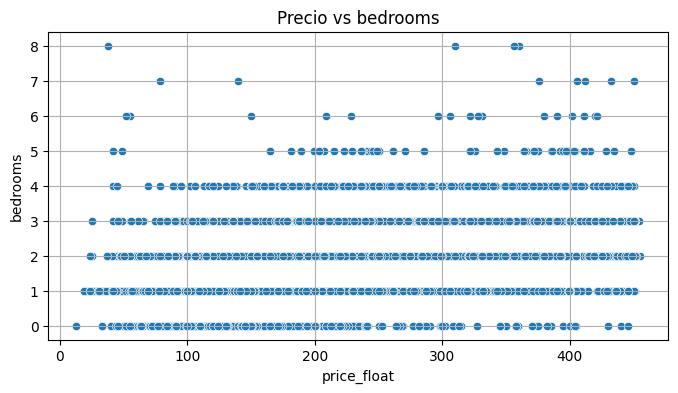

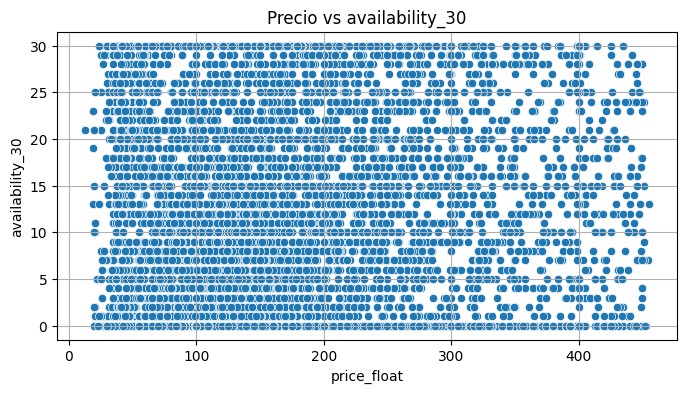

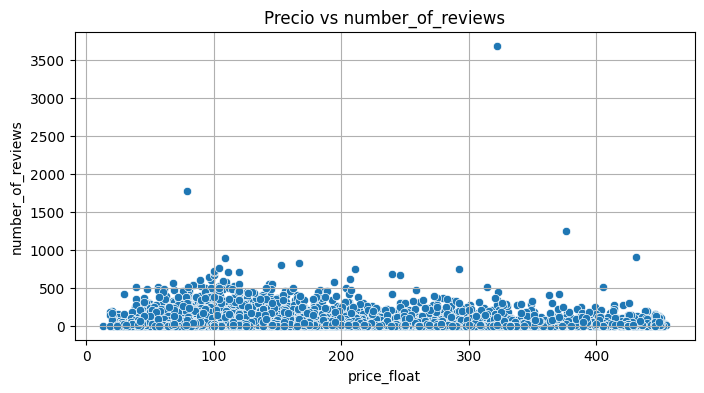

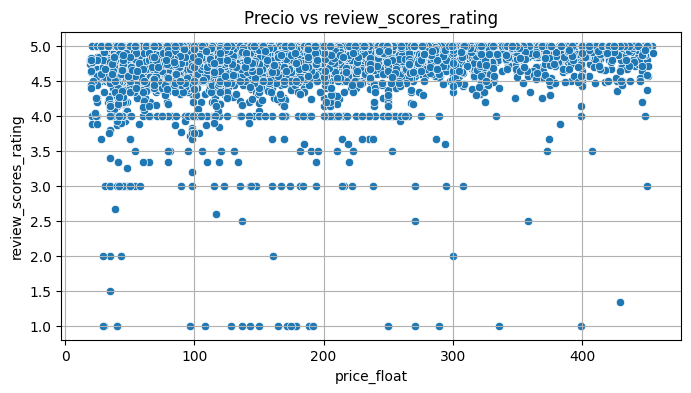

In [43]:
# Scatterplot: Precio vs Atributos numéricos
vars = ['accommodates', 'bathrooms','bedrooms', 'availability_30', 'number_of_reviews', 'review_scores_rating']

# Plotting the relationship between price and other numeric variables
def relationship_price_numbers(df, columns):
    for var in columns:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df['price_float'], y=df[var])
        plt.title(f'Precio vs {var}')
        plt.grid()
        plt.show()

relationship_price_numbers(dataset_analysis, vars)

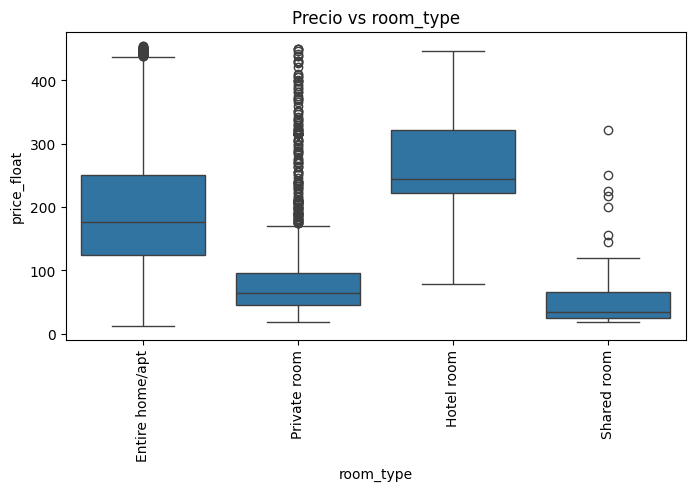

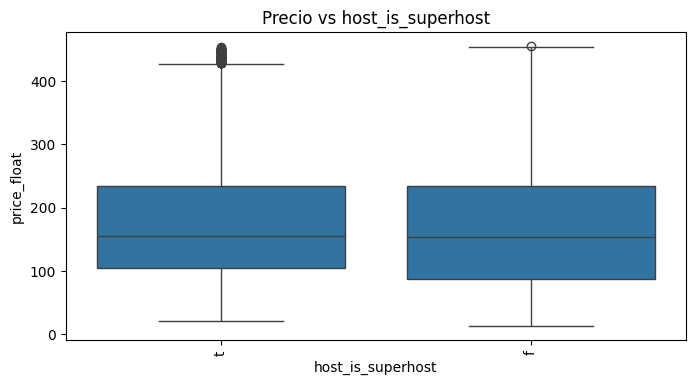

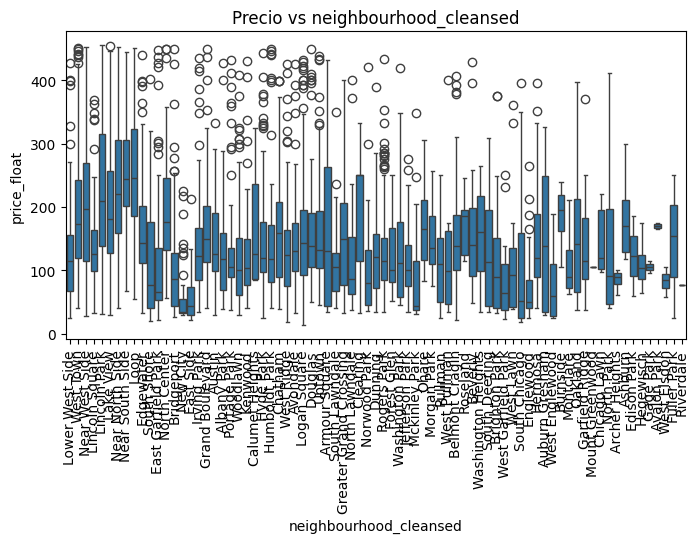

In [44]:
# Scatterplot: Precio vs Atributos categoricos
vars = ['room_type', 'host_is_superhost', 'neighbourhood_cleansed']

# Plotting the relationship between price and other categoric variables
def relationship_price_category(df, columns):
    for var in columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[var], y=df['price_float'])
        plt.title(f'Precio vs {var}')
        plt.xticks(rotation=90)
        plt.show()

    #sns.boxplot(x='property_type', y='price', data=df)

relationship_price_category(dataset_analysis, vars)

**Revisemos específicamente los vecindarios, no es muy clara su distribución:**

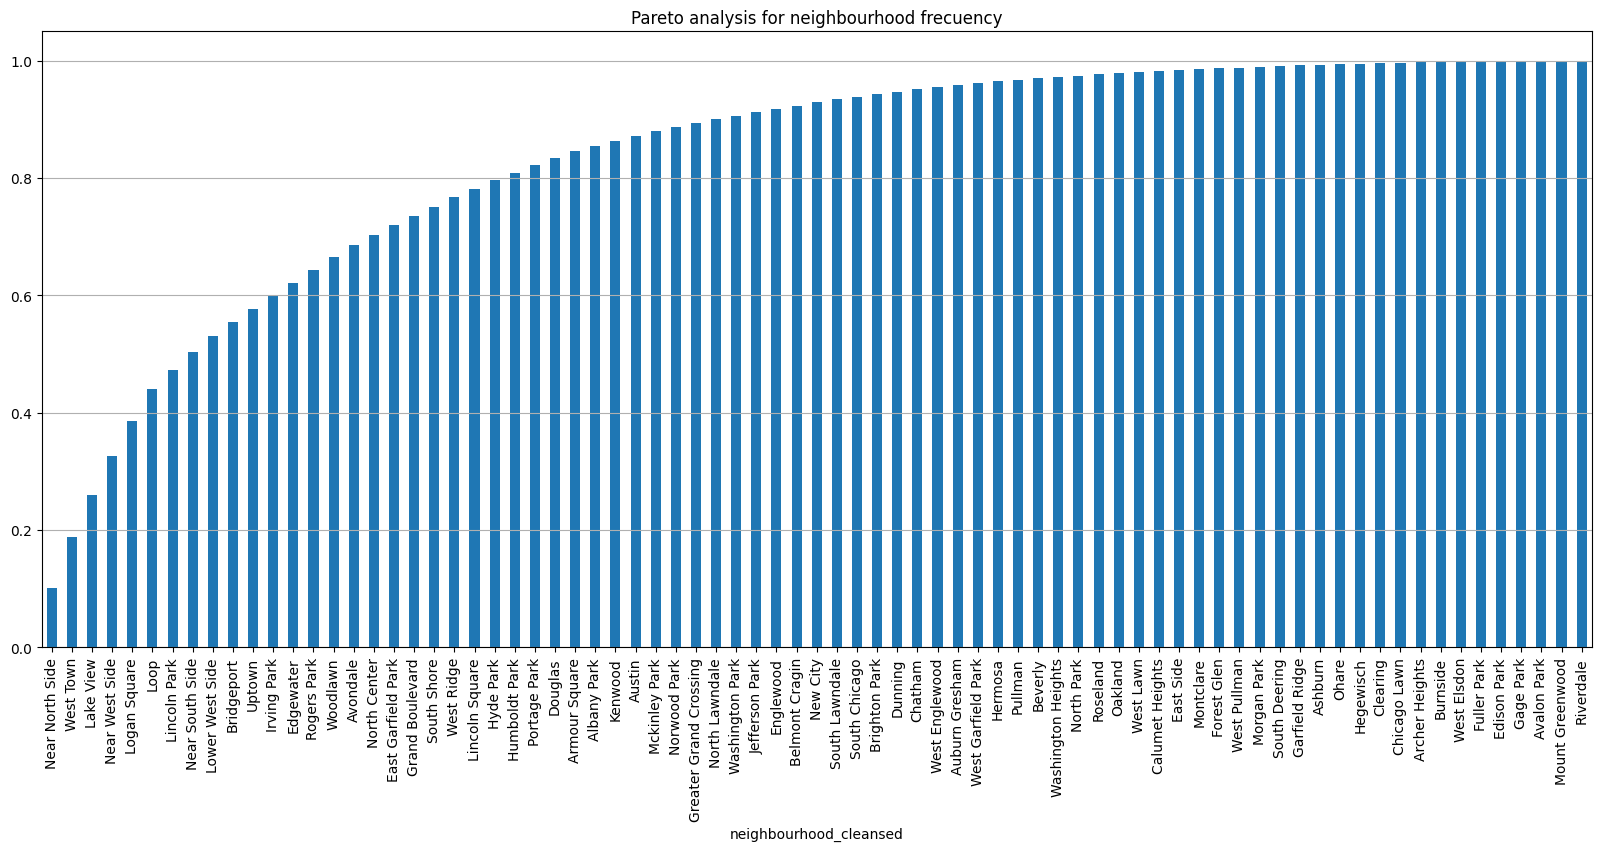

In [47]:
neighbourhood_f = dataset_analysis["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()
plt.figure(figsize=(20, 8))
neighbourhood_f.plot(kind="bar")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [49]:
representative_neighbourhoods = neighbourhood_f.loc[neighbourhood_f < 0.8].index.tolist()

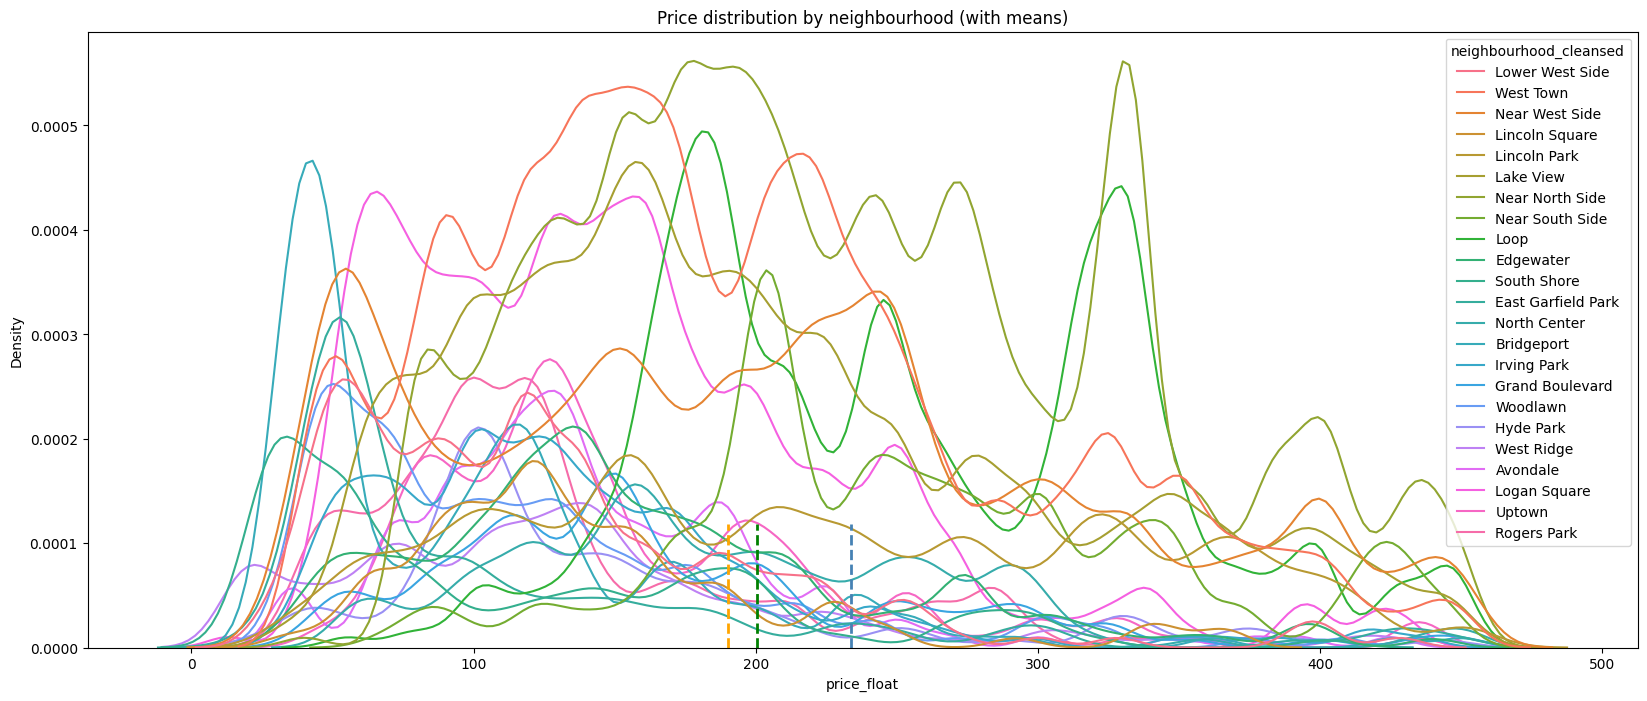

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=dataset_analysis.loc[dataset_analysis["neighbourhood_cleansed"].isin(representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(dataset_analysis.loc[dataset_analysis["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

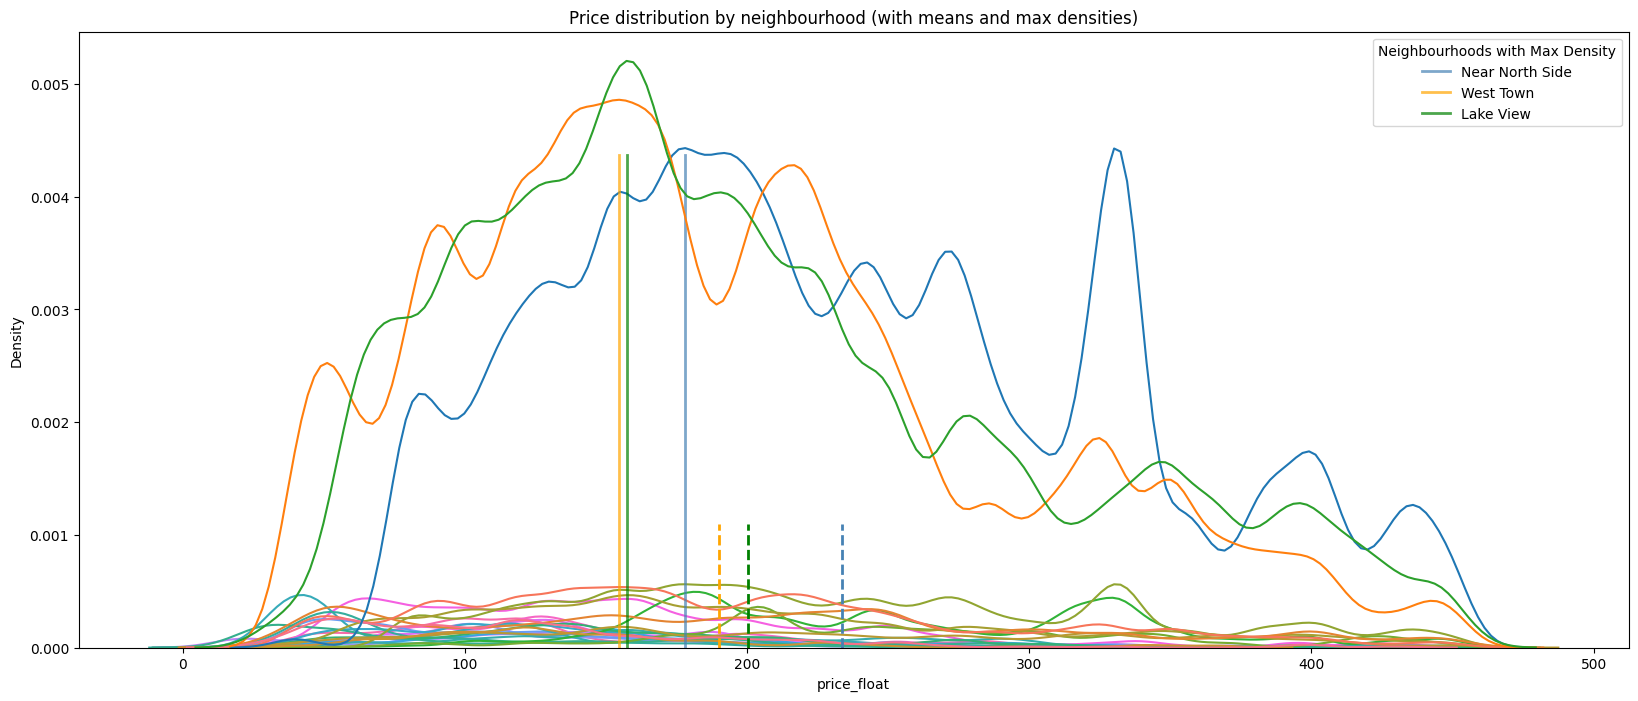

In [63]:
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Graficar el KDE
sns.kdeplot(
    data=dataset_analysis.loc[dataset_analysis["neighbourhood_cleansed"].isin(representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)

# Resaltar los vecindarios con mayor densidad
handles = []  # Para la leyenda
for neighbourhood, color in zip(representative_neighbourhoods, ["steelblue", "orange", "green"]):
    # Filtrar los datos del vecindario actual
    data = dataset_analysis.loc[dataset_analysis["neighbourhood_cleansed"] == neighbourhood, "price_float"]

    # Obtener las densidades y los precios asociados
    density = sns.kdeplot(data, bw_adjust=.3).get_lines()[-1].get_data()
    prices, densities = density

    # Obtener el precio con mayor densidad
    max_density_price = prices[np.argmax(densities)]

    # Graficar una línea vertical en la media y el punto de máxima densidad
    ax.axvline(data.mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
    line = ax.axvline(max_density_price, color=color, linestyle="solid", linewidth=2, ymax=0.8, alpha=0.7)

    # Añadir a la leyenda
    handles.append(line)
    ax.annotate(f"{neighbourhood}\nMax density: {int(max_density_price)}",
                xy=(max_density_price, 0.05), xycoords='data',
                textcoords="offset points", xytext=(0, 10),
                ha='center', color=color)

# Añadir la leyenda personalizada
ax.legend(handles, representative_neighbourhoods, title="Neighbourhoods with Max Density", loc='upper right')

plt.title("Price distribution by neighbourhood (with means and max densities)")
plt.show()


### Conclusiones:
1. La sensibilidad del precio en variables numéricas se concentra en la cantidad de personas que pueden estar en el airbnb, pues se ve una ligera relación positiva entre el precio y los accommodates, esto se puede extender a la cantidad de habitaciones dentro de las propiedades.
2. El precio se ve afectado con las variables categoricas también, especialmente con el tipo de propiedad, cuando son apartamentos o casas completas los precios suelen ser mayores comparados a habitaciones compartidas o privadas, lo mismo pasa con habitaciones de hotel, los usuarios suelen pagar más por esas dos opciones.
3. Vecindarios o barrios como 'Near North Side', 'West Town', 'Lake View', 'Loop'. Son las zonas con mayor demanda por airbnbs, pues son las zonas más concurridas por los turistas y con menor cantidad de hoteles tradicionales por el area. Sin embargo, 'Near North Side' y 'Loop' son las zonas donde más se concentran los airbnbs con un precio mayor, esto porque son las zonas más exclusivas de chicago y donde los hoteles son de precios altos, por lo tanto los airbnbs deben ser competitivos a estos.